<a href="https://colab.research.google.com/github/tayfununal/PyTorch/blob/main/2d_nf_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import torch
import numpy as np
import torch.distributions as dist
import matplotlib.pyplot as plt


In [41]:
mu = torch.tensor([0., 0.])
sigma = torch.tensor([[1., 0.], [0., 1.]])

p_z = dist.MultivariateNormal(mu, sigma)

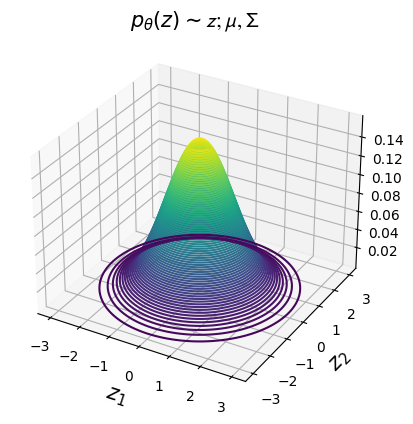

In [42]:
z = p_z.sample((1000,))

"""plt.figure(figsize=(5, 5))
plt.scatter(z[:, 0], z[:, 1])
fig = plt.figure()"""


x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

ax = plt.axes(projection='3d')
#ax.scatter3D(z[:, 0], z[:, 1], p_z.log_prob(z).exp())
ax.contour3D(x, y, p_z.log_prob(torch.tensor(np.array([X,Y]).T)).exp(), 100)

ax.set_xlabel('$z_1$', fontsize=15)
ax.set_ylabel('$z_2$', fontsize=15)
ax.set_title('$p_{\\theta}(z) \sim \mathcal{z;\mu, \Sigma}$', fontsize=15)
plt.show()

In [43]:
np.cov(z.T)

array([[0.99422762, 0.05438595],
       [0.05438595, 1.01286393]])

$$
    \begin{align}
      f(z_1,z_2) = \begin{bmatrix}
                      2z_1\\
                      3z_2+5
                  \end{bmatrix}
    \end{align}
$$

In [44]:
def f (z):
    x_1 = 2 * z[:,0].reshape(-1,1)
    x_2 = (3 * z[:, 1] + 5).reshape(-1,1)
    return torch.cat((x_1, x_2), dim=1)

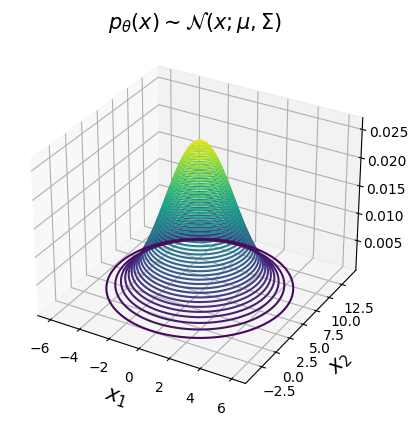

In [45]:
x = f(z)

"""plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1])
plt.show()"""

z_1 = np.linspace(-3, 3, 100)
z_2 = np.linspace(-3, 3, 100)
Z_1, Z_2 = np.meshgrid(z_1, z_2)

Z = np.array([Z_1, Z_2]).T

for i in range(len(Z)):
    Z[i,:,:] = f(torch.tensor(Z[i,:,:]))

p_theta_x = p_z.log_prob(torch.tensor(np.array([Z_1, Z_2]).T)).exp() * 1/6

p_theta_z = p_z.log_prob(torch.tensor(np.array([Z_1, Z_2]).T)).exp()

ax = plt.axes(projection='3d')

ax.contour3D(Z.T[0], Z.T[1], p_theta_x, 50)

ax.set_xlabel('$x_1$', fontsize=15)
ax.set_ylabel('$x_2$', fontsize=15)
ax.set_title('$p_{\\theta}(x) \sim \mathcal{N}(x;\mu, \Sigma)$', fontsize=15)
plt.show()

In [46]:
np.cov(x.T)

array([[3.97691047, 0.32631571],
       [0.32631571, 9.11577542]])

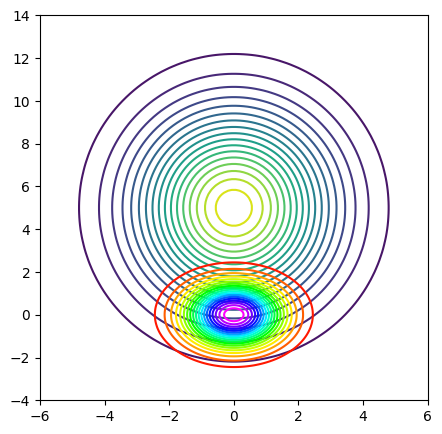

In [47]:
z_1 = np.linspace(-3, 3, 100)
z_2 = np.linspace(-3, 3, 100)
Z_1, Z_2 = np.meshgrid(z_1, z_2)

Z = np.array([Z_1, Z_2]).T

for i in range(len(Z)):
    Z[i,:,:] = f(torch.tensor(Z[i,:,:]))

p_theta_x = p_z.log_prob(torch.tensor(np.array([Z_1, Z_2]).T)).exp() * 1/6

p_theta_z = p_z.log_prob(torch.tensor(np.array([Z_1, Z_2]).T)).exp()

plt.figure(figsize=(5, 5))

plt.contour(Z.T[0], Z.T[1], p_theta_x, 20)

Z_eski = np.array([Z_1, Z_2]).T
plt.contour(Z_eski.T[0], Z_eski.T[1], p_theta_z, 20, cmap="gist_rainbow")

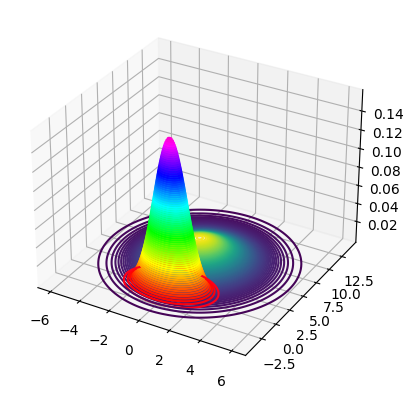

In [48]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(Z.T[0], Z.T[1], p_theta_x, 100)
ax.contour3D(Z_eski.T[0], Z_eski.T[1], p_theta_z, 100, cmap="gist_rainbow")

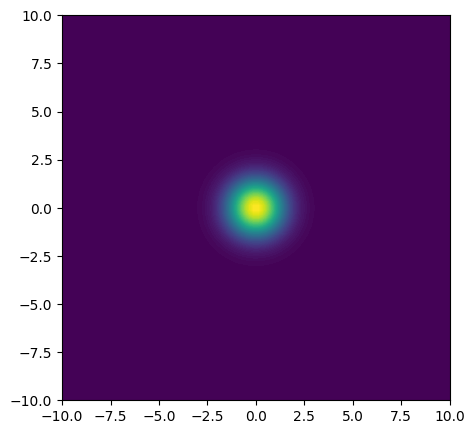

In [49]:
z_1 = np.linspace(-10, 10, 100)
z_2 = np.linspace(-10, 10, 100)
Z_1, Z_2 = np.meshgrid(z_1, z_2)

Z = [f(torch.tensor(i)) for i in np.array([X, Y]).T]
Z = torch.stack(Z)

p_theta_x = p_z.log_prob(torch.tensor(np.array([Z_1, Z_2]).T)).exp() * 1/6

plt.figure(figsize=(5, 5))

plt.contourf(Z_1, Z_2, p_theta_x, 100)

In [50]:

Z = [f(torch.tensor(i)) for i in np.array([X, Y]).T]
Z = torch.stack(Z)
Z.shape


torch.Size([100, 100, 2])

In [51]:
 p_z.log_prob(Z).shape

torch.Size([100, 100])

In [52]:
np.array([X, Y]).T.shape

(100, 100, 2)